In [339]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [340]:
# Step 1: Generate data
X,y=make_blobs(n_samples=2000,n_features=2,cluster_std=3,centers=2,random_state=42)
no_features=2
print(X.shape,y.shape)

(2000, 2) (2000,)


In [341]:
# Step 2: Visualize data
def visualize(X,y):
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
    plt.show()

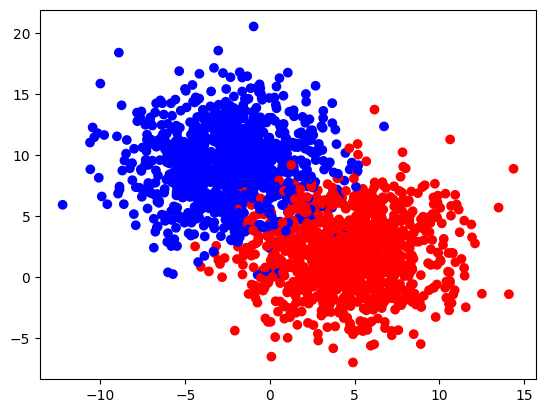

In [342]:
visualize(X,y)

In [343]:
# Step 3: normalize data
def normalize(X):
    u=np.mean(X,axis=0)
    std=np.std(X,axis=0)

    return (X-u)/std

In [344]:
# Step 4: Train Test Split
XT,Xt,yT,yt=train_test_split(X,y,test_size=0.25,shuffle=False,random_state=0)
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


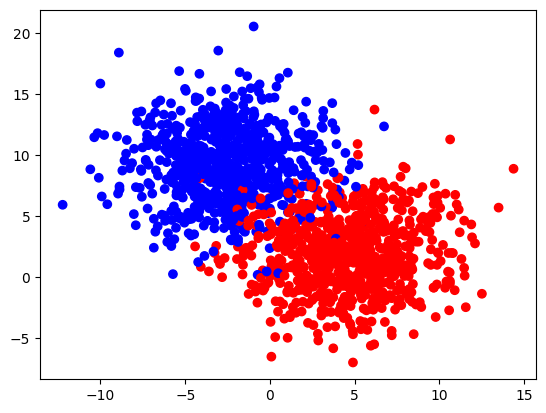

In [345]:
visualize(XT,yT)

In [346]:
# Model 
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))


# Binary Cross Entropy
def error(y,yp):
    loss= -np.mean((y*np.log2(yp))+((1-y)*np.log2(1-yp)))
    return loss

def gradient(X,y,yp):
    m=X.shape[0]
    grad=-(1/m)*np.dot(X.T,(y-yp))
    return grad

def train(X,y,max_iters=100,learning_rate=0.1):

    # randomly initialize theta
    theta=np.random.randn(no_features+1,1);
    error_list=[]
    for i in range(max_iters):
        yp=hypothesis(X,theta)
        e=error(y,yp)
        error_list.append(e)
        grad=gradient(X,y,yp)
        theta=theta-learning_rate*grad

    plt.plot(error_list)
    return theta

def predict(X,theta):
    yp=hypothesis(X,theta)
    output=np.zeros(yp.shape,dtype='int')
    output[yp>=0.5]=1
    return output

def accuracy(X,y,theta):
    preds=predict(X,theta)
    return ((y==preds).sum())/y.shape[0]*100

In [347]:
def addExtraColumn(X):
    if(X.shape[1]==no_features):
        m=X.shape[0]
        ones=np.ones((m,1))
        X=np.hstack((ones,X))
        return X
    return X

In [348]:
Xt=addExtraColumn(Xt)
print(Xt.shape)
XT=addExtraColumn(XT)
print(XT.shape)

(500, 3)
(1500, 3)


In [349]:
yT=yT.reshape(-1,1)
yt=yt.reshape(-1,1)
print(yT.shape,yt.shape)

(1500, 1) (500, 1)


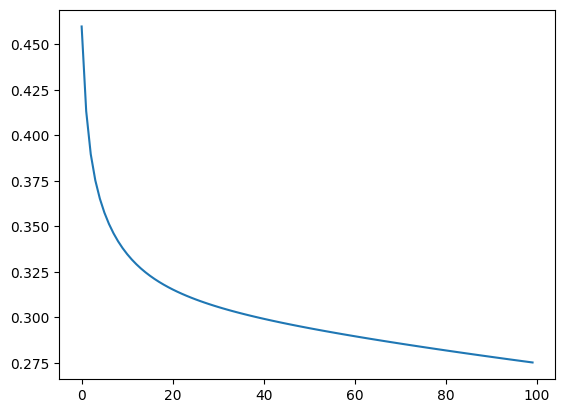

In [350]:
theta=train(XT,yT)

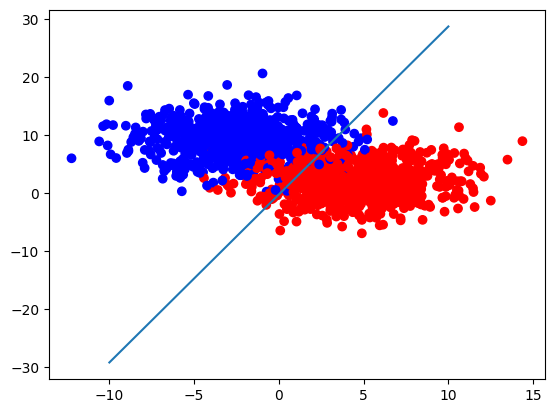

In [351]:
plt.scatter(XT[:,1],XT[:,2],c=yT,cmap='bwr');
x1=np.linspace(-10,10,6);
x2=-(theta[0]+theta[1]*x1)/theta[2];
plt.plot(x1,x2);
plt.show();



In [352]:
# Predictions
predict(Xt,theta)


array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [353]:
accuracy(Xt,yt,theta)

92.80000000000001

In [354]:
# Logistic Regression using sklearn

In [355]:
from sklearn.linear_model import LogisticRegression


In [356]:
# create
model=LogisticRegression()

In [357]:
# Training
model.fit(X,y)

LogisticRegression()

In [358]:
# Prediction
model.predict(X)

array([0, 0, 0, ..., 1, 0, 1])

In [359]:
# Scoring
model.score(X,y)

0.96